In [1]:
import numpy as np
import matplotlib.pyplot as plt

import logging
logging.getLogger('matplotlib.font_manager').disabled = True

import ipywidgets as widgets  # interactive display
%config InlineBackend.figure_format = 'retina'
# use NMA plot style
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/nma.mplstyle")
my_layout = widgets.Layout()

<h1 style="background-color:rgb(181 ,50 ,84);color:white;text-align:center">Leaky Integrate-and-fire model</h1>

Neuronal models where action potentials are described as events are called "integrate-and-fire" models. No attempt is made to describe the shape of an action potenital. They require two main components to define their dynamics:
- a linear differential equation to describe the evolution of the membrane potential;
- a threshold for spike firing

The cell membrane acts as a capacitor of capacity $C$ and is characterized by a finite leak resistance $R$. The membrane potential $u$ varies depending of the input current $I$ following: $$\tau\frac{du}{dt}=-[u(t)-u_{rest}]+RI(t)$$ where $\tau=RC$ and $u_{rest}$ represents the resting membrane potential.

In [2]:
# typical neuron parameters#
theta = -55.    # spike threshold [mV]
u_rest = -75.   # reset potential [mV]
tau_m = 10.     # membrane time constant [ms]
g_L = 10.       # leak conductance [nS]
u0 = -75.       # initial potential [mV]

# Simulation parameters 
T = 400.  # Total duration of simulation [ms]
dt = .1   # Simulation time step [ms]

# Time vector
t = np.arange(0, T+dt, dt)

In [3]:
class LIF():
    def __init__(self, u_rest, tau, R, theta):
        self.u_rest = u_rest
        self.tau = tau
        self.R = R
        self.theta = theta

    def u_dot(self, t, u, i):
        return (self.u_rest - u + self.R*i) / self.tau

    def simulate(self, t_range, dt, I):
        u = self.u_rest
        u_t = [u]
        rec_spikes = []

        forward_Euler = lambda i, y: y + dt*self.u_dot(t_range[i-1], y, I[i-1])

        for i in range(1, len(t_range)):
            if u >= self.theta:
                u = self.u_rest
                rec_spikes.append(t_range[i])
            
            u = forward_Euler(i, u)
            u_t.append(u)

        return u_t

    def set_tau(self, tau):
        self.tau = tau

    def print_params(self):
        print("u_rest: ", self.u_rest)
        print("tau: ", self.tau)
        print("R: ", self.R)
        print("theta: ", self.theta)


def plot_state(t, I, u_t):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    ax[0].plot(t, I, label='Input Current')
    ax[0].set_ylabel('I (nA)')
    ax[0].set_xlabel('Time (ms)')
    ax[0].legend()

    ax[1].plot(t, u_t, label='Membrane Potential')
    ax[1].axhline(theta, color='r', linestyle='--', label='Threshold')
    ax[1].set_ylabel('u (mV)')
    ax[1].set_xlabel('Time (ms)')
    ax[1].legend()

    plt.show()

In [5]:
def run_interactive_simulation(input_current, tau_m, g_L, u_rest, theta):
    lif_neuron = LIF(u_rest, tau_m, 1/g_L, theta)
     
    @widgets.interact(
        I_amp = widgets.FloatSlider(50., min=0., max=300., step=5., layout=my_layout),
        tau_m = widgets.FloatSlider(25., min=2., max=50., step=2., layout=my_layout)
    )

    def diff_DC(I_amp=200., tau_m=10.):
        # Change parameters
        lif_neuron.set_tau(tau_m)
        I = input_current(t, I_amp)

        # Simulation
        u_t = lif_neuron.simulate(t, dt, I)

        # Plot
        with plt.xkcd():
            plot_state(t, I, u_t)

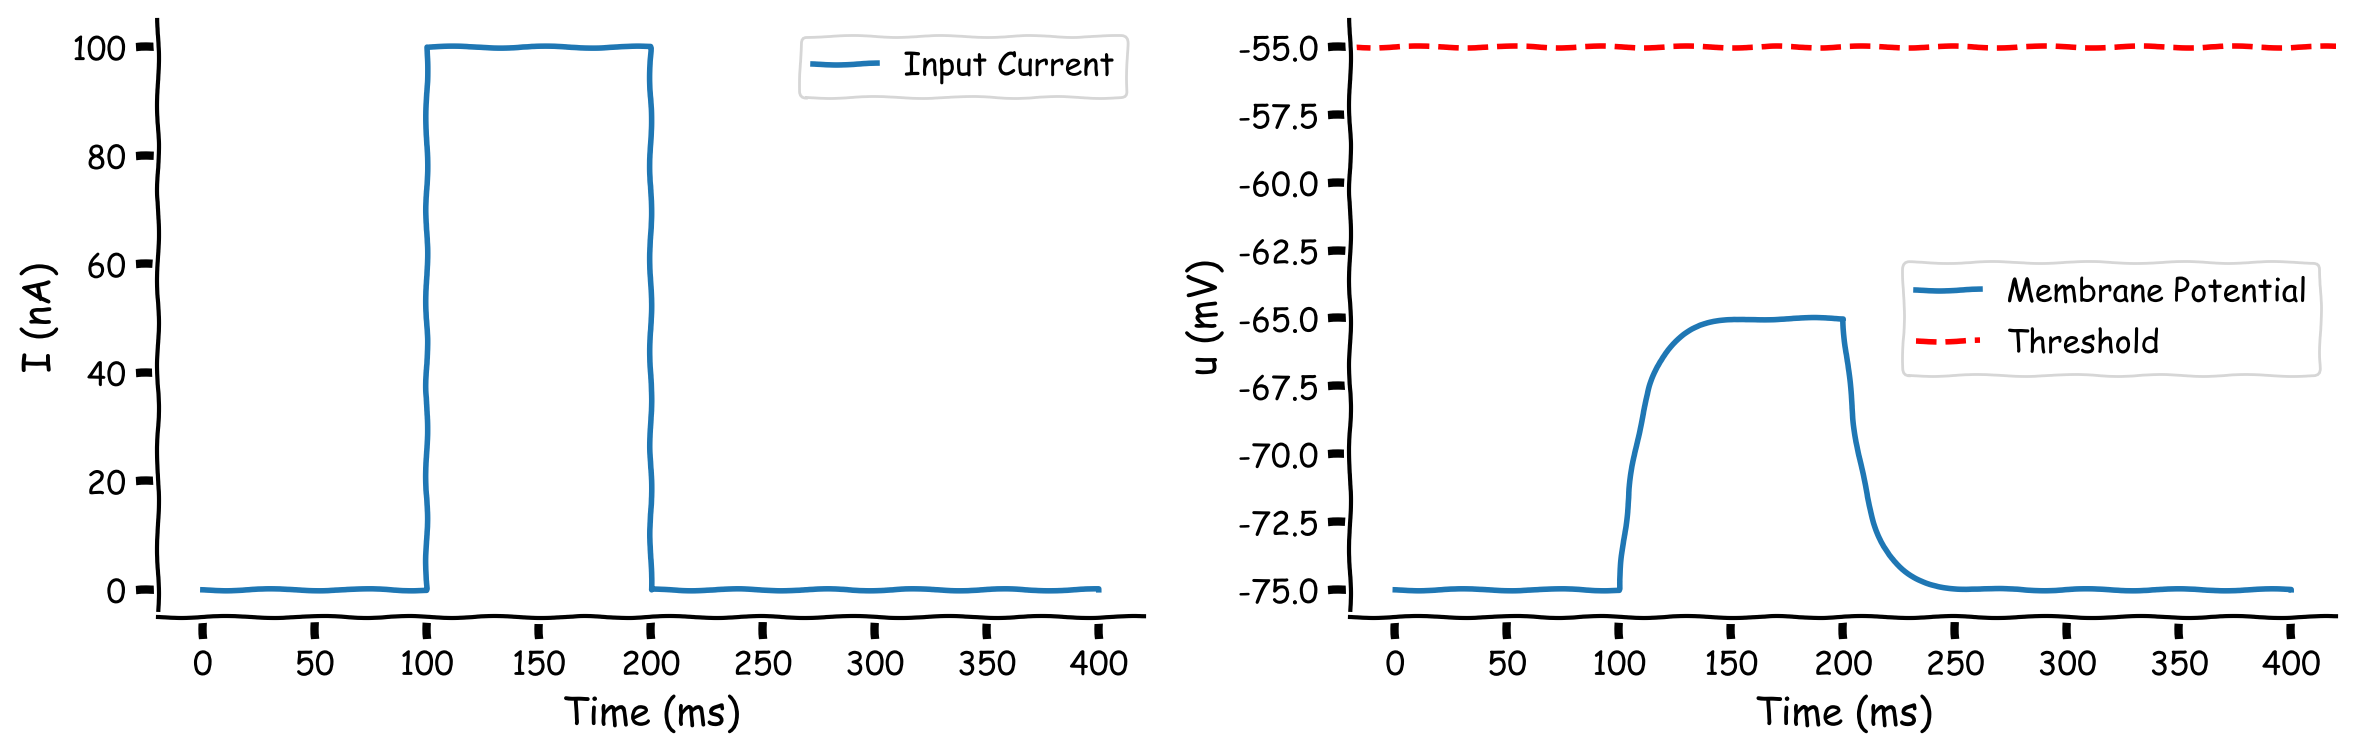

In [7]:
# Simulation example
lif_neuron = LIF(u_rest, tau_m, 1/g_L, theta)

I = np.zeros_like(t)
I[int(100/dt):int(200/dt)] = 100

u_t = lif_neuron.simulate(t, dt, I)

# Plot
with plt.xkcd():
    plot_state(t, I, u_t)

In [8]:
### DC input simulation

# Input current
def input_current_dc(t, I_amp):
    I = np.zeros_like(t)
    I[int(100/dt):int(300/dt)] = 2*I_amp  # Input current [nA]
    return I

run_interactive_simulation(input_current_dc, tau_m, g_L, u_rest, theta)

interactive(children=(FloatSlider(value=50.0, description='I_amp', max=300.0, step=5.0), FloatSlider(value=25.…

In [9]:
def input_current_sin(t, I_amp):
    I = 2*I_amp + 2 * I_amp * np.sin(2*np.pi*t/100)
    return I

run_interactive_simulation(input_current_sin, tau_m, g_L, u_rest, theta)

interactive(children=(FloatSlider(value=50.0, description='I_amp', max=300.0, step=5.0), FloatSlider(value=25.…

In [10]:
def input_current_ramp(t, I_amp):
    I = I_amp + 0.1*t
    return I

run_interactive_simulation(input_current_ramp, tau_m, g_L, u_rest, theta)

interactive(children=(FloatSlider(value=50.0, description='I_amp', max=300.0, step=5.0), FloatSlider(value=25.…